# Predicting the Strength of Concrete

### Read and Clean Data

Features used in the data: 
    1. Cement
    2. Slag (Blast Furnace) 
    3. Fly Ash
    4. Water 
    5. Superplasticizer 
    6. Coarse Aggregate
    7. Fine Aggregate

In [3]:
import pandas as pd
import numpy as np

concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Look at the statistical description of the data and also check if there are any missing values

In [4]:
display(concrete_data.describe())
display(concrete_data.isnull().sum())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

We observe that Cement has the highest Correlation with the Strength, while fly ash has very little correlation.

## Visualize the Feature Correlations

In [34]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
corr=concrete_data.corr(method='pearson')
corr

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


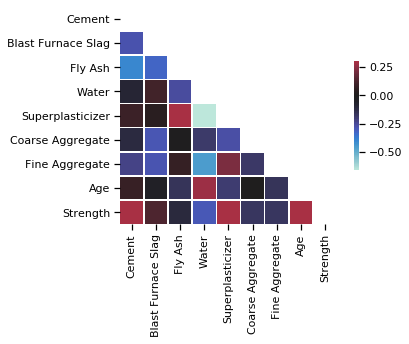

In [86]:
# Generate a mask for the upper triangle of the heatmap 

mask = np.triu(np.ones_like(corr, dtype=np.bool))

sb.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

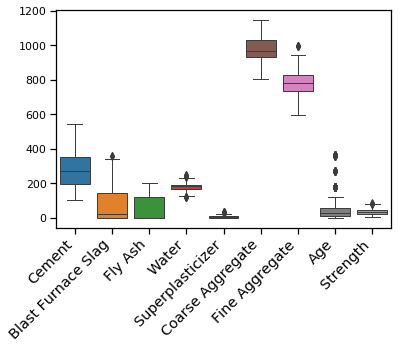

<Figure size 432x288 with 0 Axes>

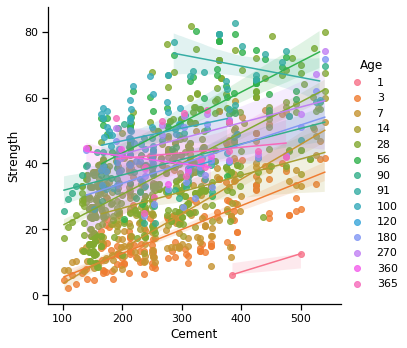

In [56]:
plt.figure(1) 
sb.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
g = sb.boxplot(data=concrete_data)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='large')
    
plt.show(g)


plt.figure(2)
sb.lmplot(x = 'Cement', y = 'Strength', hue = 'Age', data=concrete_data)

We observe that Cement has a positive Correlation with the Strength, except for the Age of 90-91. 

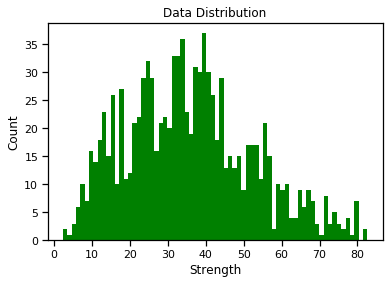

<Figure size 432x288 with 0 Axes>

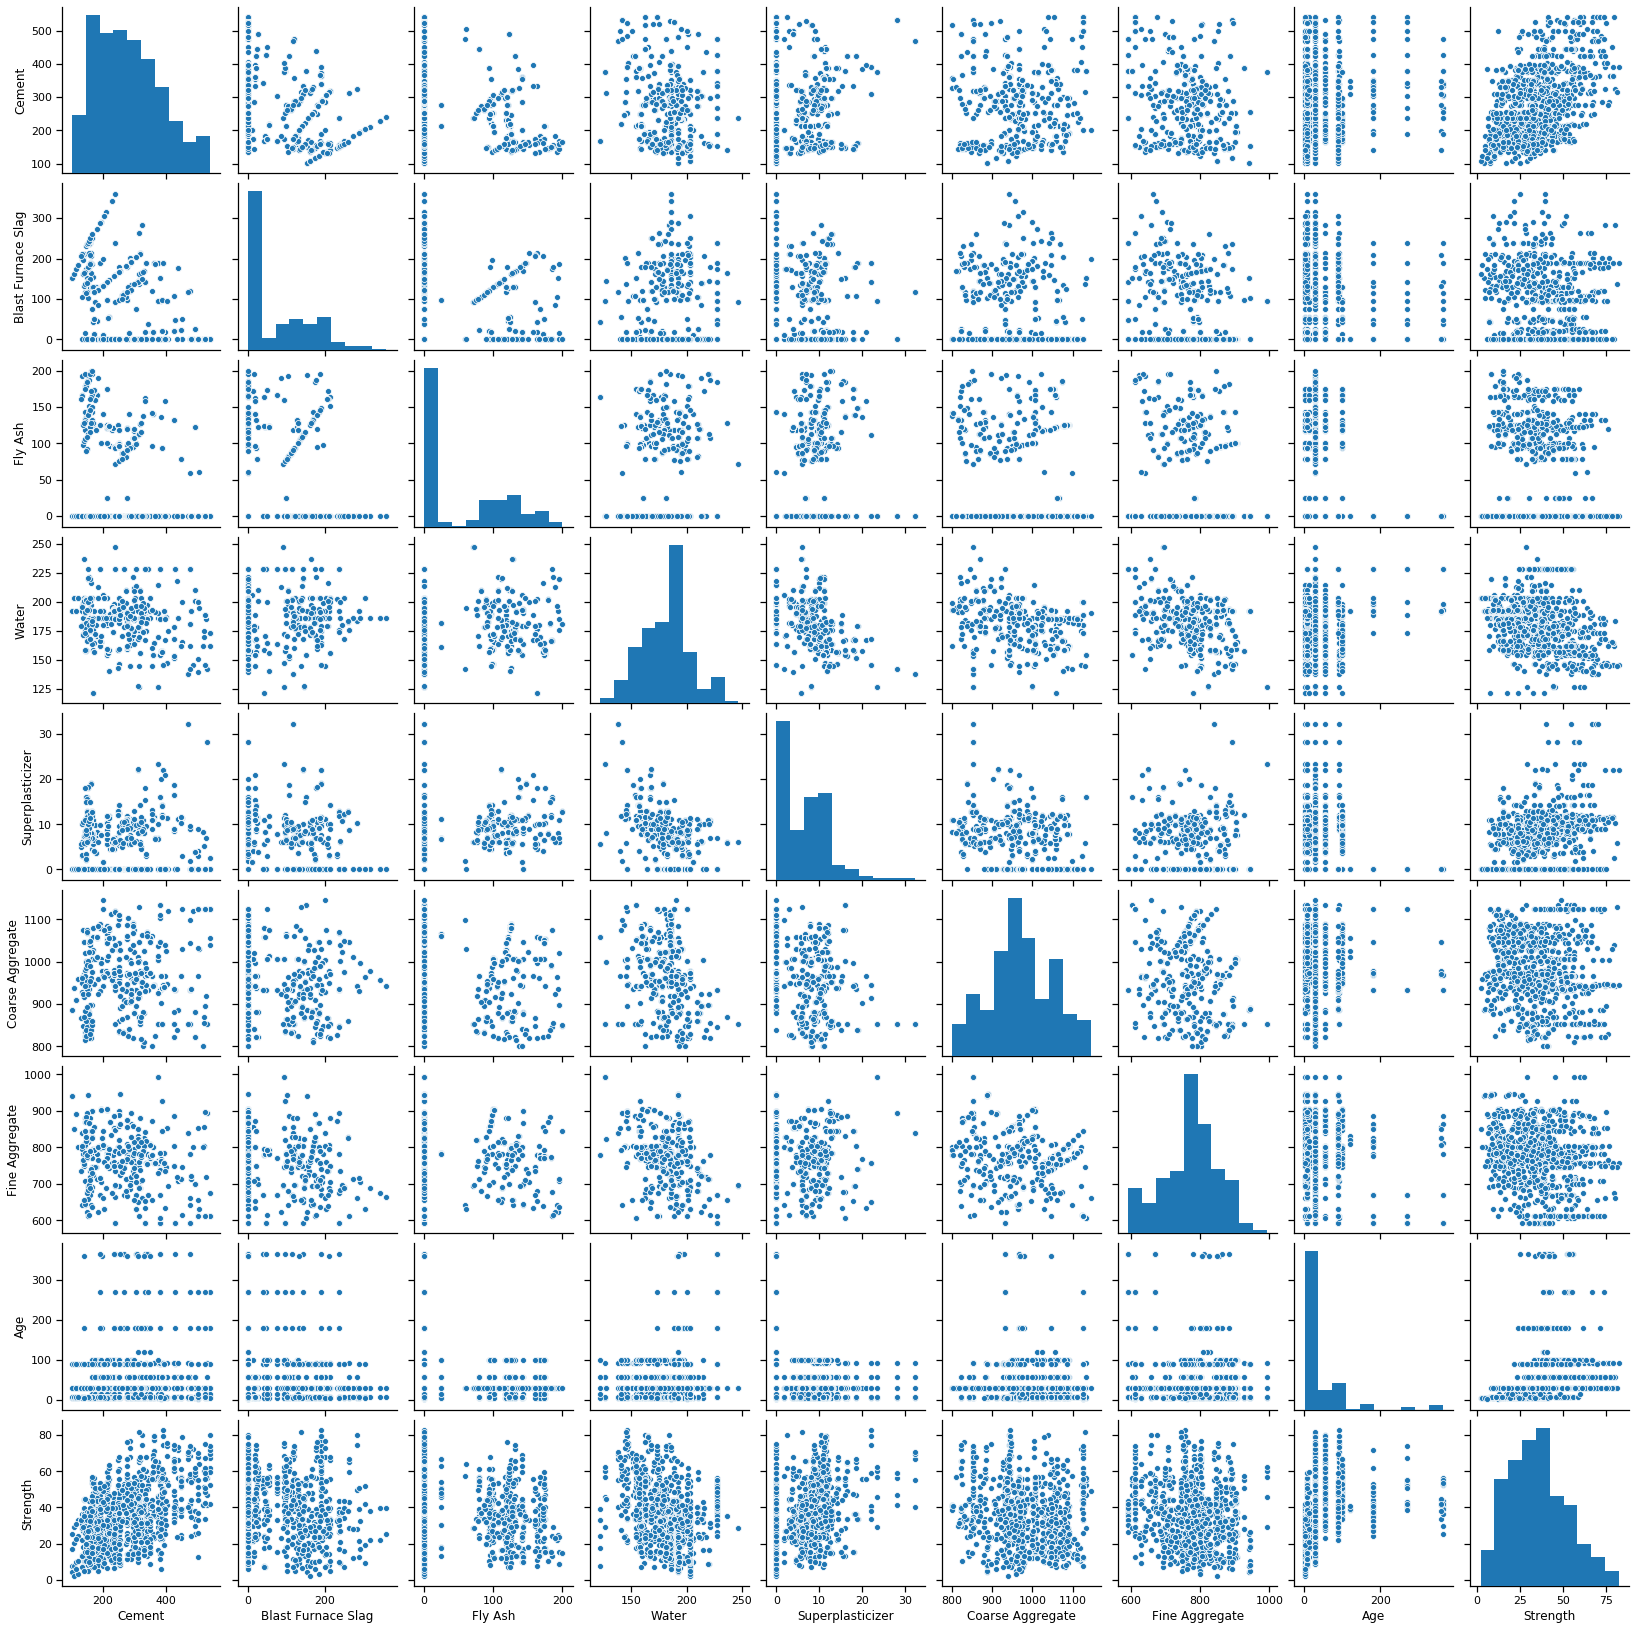

In [83]:
# sb.heatmap(data=concrete_data)
plt.figure(1)
# sb.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
plt.hist(concrete_data.Strength,
        color = 'g',
        bins = 70)

plt.xlabel('Strength')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()

plt.figure(2)
sb.pairplot(concrete_data)

As we can see from the distribution, the data is positively skewed, and the pairplot allows us to visualize the relationship between the features and target

#### Split the target columns from the features

In [87]:
concrete_data_columns = concrete_data.columns
display(concrete_data_columns)

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
predictors.head()


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [6]:
target = concrete_data['Strength']
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

#### Normalize the Data

In [7]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Get the Number of Predictors/Features to use in the Network Params


In [8]:
n = predictors_norm.shape[1]

display(n)

8

 ## Part A: Build a Baseline Model

Using the Keras Library, we build a Neural Network with: 
    - Non-normalized Data
    - One Hidden Layer of 50 nodes and ReLU activation
    - Adam Optimizer
    - MSE Loss

Import Keras from Tensorflow 

(To install on Windows 10 using Anaconda: 

    conda create -n tf tensorflow
    conda activate tf
    
Restart the Notebook from the tensorflow env) 

In [9]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


#### Define a model

In [92]:
def regression_model():
    # create model
    model = Sequential()
    
    #hidden layer
    model.add(Dense(50, activation='relu', input_shape=(n,)))
    
    #output layer
    model.add(Dense(1)) 
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
    return model

#### Create a Model using the Fuction and Train it on our Training Data

Loop through 50 times. For each Loop: 
    1. Split the data into Train and Test set
    2. Train the model 
    3. Test the model using mean_squared_error metric
    4. Append the Loss of each model to a list of 50 mean squared errors

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lossA = []



for i in range(1,51):
    xtr, xte, ytr, yte = train_test_split( predictors, target, test_size=0.3)
    model = regression_model()
    model.fit(xtr, ytr, validation_data=(xte, yte), epochs=50, verbose=0) 
    scores = model.evaluate(xte,  yte, verbose=0)
    print('%s : %.2f'%(model.metrics_names[0],scores[0]))
    lossA.append(scores[0])
#     print(loss[i-1])

#  using loss[i-1] = loss.append will change the sequence of items and return None
# verbose shows the output as epochs. basically a representation, nothing technical.

loss : 62.71
loss : 88.72
loss : 75.11
loss : 97.93
loss : 85.01
loss : 86.11
loss : 103.27
loss : 91.21
loss : 71.97
loss : 93.28
loss : 92.22
loss : 58.05
loss : 108.21
loss : 109.48
loss : 100.32
loss : 64.42
loss : 85.27
loss : 56.96
loss : 108.73
loss : 77.49
loss : 76.85
loss : 88.91
loss : 144.06
loss : 67.70
loss : 103.94
loss : 78.39
loss : 90.10
loss : 64.02
loss : 62.77
loss : 72.05
loss : 67.41
loss : 80.78
loss : 74.91
loss : 68.14
loss : 67.56
loss : 123.06
loss : 58.19
loss : 79.12
loss : 89.72
loss : 143.89
loss : 124.54
loss : 108.96
loss : 96.33
loss : 111.51
loss : 66.06
loss : 108.98
loss : 77.53
loss : 97.91
loss : 74.04
loss : 122.52


#### Evaluate the Model

In [94]:
print("MSE Loss %.2f with std (+/- %.2f)" % (np.mean(lossA), np.std(lossA)))

MSE Loss 88.13 with std (+/- 21.28)


## Part B : Model with Normalized Data
Using the Keras Library, we build a Neural Network with: 
    - Normalized Data
    - One Hidden Layer of 10 nodes and ReLU activation
    - Adam Optimizer
    - MSE Loss


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lossB = []



for i in range(1,51):
    xtr, xte, ytr, yte = train_test_split( predictors_norm, target, test_size=0.3)
    model = regression_model()
    model.fit(xtr, ytr, validation_data=(xte, yte), epochs=50, verbose=0) 
    scores = model.evaluate(xte,  yte, verbose=0)
    print('%s : %.2f'%(model.metrics_names[0],scores[0]))
    lossB.append(scores[0])

loss : 133.65
loss : 157.56
loss : 133.51
loss : 154.19
loss : 157.95
loss : 155.04
loss : 163.27
loss : 157.55
loss : 139.91
loss : 157.35
loss : 143.37
loss : 151.73
loss : 157.62
loss : 166.36
loss : 164.89
loss : 153.21
loss : 151.76
loss : 162.45
loss : 151.96
loss : 158.28
loss : 139.87
loss : 146.88
loss : 158.64
loss : 148.58
loss : 160.27
loss : 171.04
loss : 146.78
loss : 169.48
loss : 155.84
loss : 147.87
loss : 154.03
loss : 143.31
loss : 154.65
loss : 154.00
loss : 156.17
loss : 151.64
loss : 151.32
loss : 164.67
loss : 160.48
loss : 161.23
loss : 140.71
loss : 164.98
loss : 156.44
loss : 160.86
loss : 153.22
loss : 169.83
loss : 145.63
loss : 149.73
loss : 152.30
loss : 162.01


In [96]:
print("MSE Loss %.2f with std (+/- %.2f)" % (np.mean(lossB), np.std(lossB)))

MSE Loss 154.48 with std (+/- 8.63)


Difference in MSE between Part A (Non-Normalized) and Part B (Normalized)

In [97]:
print('The difference is %.2f between A and B' %abs(np.mean(lossB)-np.mean(lossA)))

The difference is 66.35 between A and B


We observe that normalization usually reduces the loss incurred

## Part C: Increasing Number of Epochs

Define a New regression model function with more epochs

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lossC = []



for i in range(1,51):
    xtr, xte, ytr, yte = train_test_split( predictors_norm, target, test_size=0.3)
    model = regression_model()
    model.fit(xtr, ytr, validation_data=(xte, yte), epochs=100, verbose=0) 
    scores = model.evaluate(xte,  yte, verbose=0)
    print('%s : %.2f'%(model.metrics_names[0],scores[0]))
    lossC.append(scores[0])

loss : 106.57
loss : 90.54
loss : 83.78
loss : 84.42
loss : 101.23
loss : 116.21
loss : 91.11
loss : 91.15
loss : 107.11
loss : 96.46
loss : 89.09
loss : 92.17
loss : 103.16
loss : 79.15
loss : 95.39
loss : 81.00
loss : 93.93
loss : 77.66
loss : 93.43
loss : 94.32
loss : 100.02
loss : 90.32
loss : 87.47
loss : 97.25
loss : 97.33
loss : 92.12
loss : 85.53
loss : 93.02
loss : 94.92
loss : 84.84
loss : 94.66
loss : 88.90
loss : 99.41
loss : 93.25
loss : 96.23
loss : 101.14
loss : 101.89
loss : 92.54
loss : 98.69
loss : 75.36
loss : 100.46
loss : 86.97
loss : 91.67
loss : 89.07
loss : 87.96
loss : 87.40
loss : 97.89
loss : 88.79
loss : 95.05
loss : 99.44


In [99]:
print("MSE Loss %.2f with std (+/- %.2f)" % (np.mean(lossC), np.std(lossC)))
print('The difference is %.2f between B and C' %abs(np.mean(lossB)-np.mean(lossC)))

MSE Loss 93.15 with std (+/- 7.66)
The difference is 61.33 between B and C


We observe that increasing the training epochs can improve performance

## Part D Increase the number of Hidden Layers

Using the Keras Library, we build a Neural Network with: 
    - Normalized Data
    - Three Hidden Layers of 10 nodes and ReLU activation
    - Adam Optimizer
    - MSE Loss


In [100]:
def regression_model2():
    # create model
    model2 = Sequential()
    
    #hidden layer
    model2.add(Dense(50, activation='relu', input_shape=(n,)))
    model2.add(Dense(50, activation='relu'))
    model2.add(Dense(50, activation='relu'))
               
    #output layer
    model2.add(Dense(1)) 
    
    # compile model
    model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
    return model2

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lossD = []



for i in range(1,51):
    xtr, xte, ytr, yte = train_test_split( predictors_norm, target, test_size=0.3)
    model = regression_model()
    model.fit(xtr, ytr, validation_data=(xte, yte), epochs=50, verbose=0) 
    scores = model.evaluate(xte,  yte, verbose=0)
    print('%s : %.2f'%(model.metrics_names[0],scores[0]))
    lossD.append(scores[0])

loss : 164.73
loss : 166.36
loss : 149.25
loss : 151.57
loss : 147.45
loss : 156.98
loss : 157.26
loss : 147.96
loss : 126.31
loss : 164.13
loss : 151.71
loss : 161.93
loss : 164.98
loss : 158.31
loss : 169.03
loss : 160.84
loss : 130.92
loss : 148.07
loss : 156.35
loss : 142.98
loss : 167.19
loss : 150.34
loss : 153.25
loss : 160.55
loss : 159.90
loss : 157.50
loss : 166.08
loss : 161.92
loss : 148.73
loss : 162.85
loss : 145.47
loss : 138.49
loss : 163.61
loss : 148.03
loss : 164.40
loss : 176.28
loss : 160.97
loss : 167.94
loss : 158.61
loss : 154.42
loss : 153.32
loss : 160.65
loss : 151.19
loss : 152.90
loss : 153.28
loss : 150.20
loss : 142.87
loss : 172.91
loss : 128.64
loss : 157.64


In [102]:
print("MSE Loss %.2f with std (+/- %.2f)" % (np.mean(lossD), np.std(lossD)))
print('The difference is %.2f between B and C' %(np.mean(lossB)-np.mean(lossD)))

MSE Loss 155.35 with std (+/- 10.45)
The difference is -0.86 between B and C


We observe that Model D with More hidden layers (Deep Neural Network) performs better than Model B with only one Hidden Layer (Shallow Neural Network)